In [0]:
# Import the machine learning libraries.
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
# Load the Parkinson's Disease dataset.
# The dataset can be downloaded here: https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/
df = pd.read_csv('/content/drive/My Drive/ML_Code/PD Detection/parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [0]:
# Split a dataset into X and y.
features =df.loc[:,df.columns!='status'].values[:,1:]
labels = df.loc[:,'status'].values

In [24]:
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


In [0]:
# Normailization.
scaler = MinMaxScaler((-1,1))
X = scaler.fit_transform(features)
y = labels

In [0]:
# Split the dataset into the training set and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [28]:
# Make predictions.
%%time
y_pred = model.predict(X_test)

CPU times: user 1.33 ms, sys: 0 ns, total: 1.33 ms
Wall time: 1.13 ms


In [29]:
# Print classification report.
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.96      0.98        46

    accuracy                           0.97        59
   macro avg       0.93      0.98      0.95        59
weighted avg       0.97      0.97      0.97        59



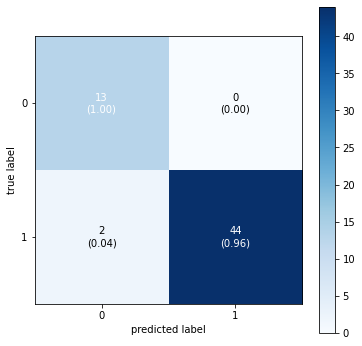

CPU times: user 189 ms, sys: 3.3 ms, total: 192 ms
Wall time: 188 ms


In [32]:
# Plot the confusion matrix.
%%time
from mlxtend.plotting import plot_confusion_matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(6,6))
plt.show()

In [33]:
# Print accuracy.
print("Accuracy:", metrics.accuracy_score(y_test, y_pred), "\n")

Accuracy: 0.9661016949152542 

